<a href="https://colab.research.google.com/github/ArPaWi/ML_PadiCare/blob/arya/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import io
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
input_img = Input(shape=(256, 256, 3))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 256, 256, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,464 (388.54 KB)

 Trainable params: 49,731 (194.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,733 (194.27 KB)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load dan latih data daun padi
train_generator = datagen.flow_from_directory('/content/drive/MyDrive/dataAutoencoder/', target_size=(256, 256), batch_size=32, class_mode='input')

autoencoder.fit(train_generator, epochs=5)

Found 1200 images belonging to 1 classes.
Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 537s 13s/step - loss: 0.0327
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 498s 13s/step - loss: 0.0040
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 486s 13s/step - loss: 0.0025
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 494s 13s/step - loss: 0.0016
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 496s 13s/step - loss: 0.0011


In [ ]:
# Simpan model
autoencoder.save('autoencoder_model.keras')

In [ ]:
# Muat model autoencoder yang sudah dilatih
autoencoder = load_model('autoencoder_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Fungsi untuk menghitung rekonstruksi error
def calculate_reconstruction_error(original_image, reconstructed_image):
    # Hitung MSE (Mean Squared Error) antara gambar asli dan rekonstruksi
    error = np.mean(np.square(original_image - reconstructed_image))  # MSE
    return error

In [ ]:
# Fungsi untuk mendeteksi apakah gambar daun padi atau bukan
def detect_anomaly(img_data, threshold=0.006):
    # Memuat gambar dan melakukan preprocessing
    img_array = image.img_to_array(img_data) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan batch dimension

    # Rekonstruksi gambar menggunakan autoencoder
    reconstructed_img = autoencoder.predict(img_array)

    # Hitung error rekonstruksi
    error = calculate_reconstruction_error(img_array[0], reconstructed_img[0])

    print(f"Reconstruction error: {error}")

    # Tentukan apakah gambar anomali atau bukan (daun padi)
    if error > threshold:
        print("Gambar ini bukan daun padi.")
    else:
        print("Gambar ini adalah daun padi.")

    # Tampilkan gambar asli dan rekonstruksi untuk visualisasi
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array[0])
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_img[0])
    plt.title("Reconstructed Image")
    plt.show()

In [ ]:
# Fungsi untuk menangani gambar yang diunggah
def on_upload_change(change):
    # Pastikan gambar diupload
    if uploader.value:
        for filename, file_info in uploader.value.items():
            # Membaca file gambar
            img_data = Image.open(io.BytesIO(file_info['content']))
            # Resize the image to 256x256
            img_data = img_data.resize((256, 256))
            print(f"File {filename} telah diunggah.")
            detect_anomaly(img_data)

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

File kucing2.jpeg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Reconstruction error: 0.008826098404824734
Gambar ini bukan daun padi.


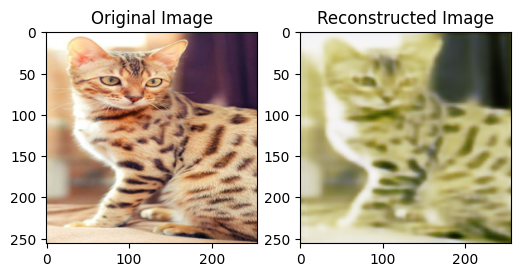

File traktor.jpeg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Reconstruction error: 0.011251818388700485
Gambar ini bukan daun padi.


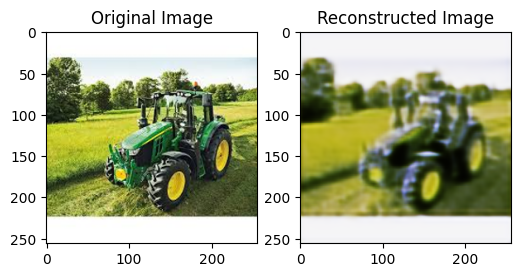

File sapi.jpeg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Reconstruction error: 0.008850472047924995
Gambar ini bukan daun padi.


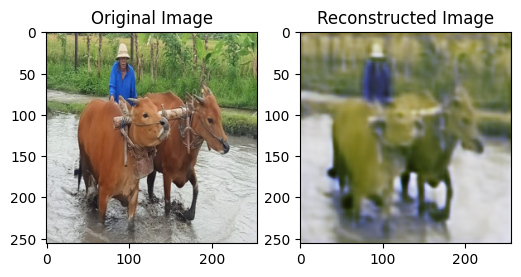

File petani2.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Reconstruction error: 0.016762517392635345
Gambar ini bukan daun padi.


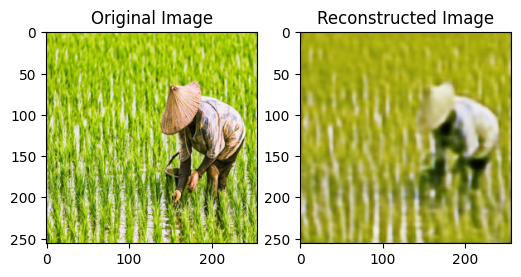

File petani.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Reconstruction error: 0.010095840319991112
Gambar ini bukan daun padi.


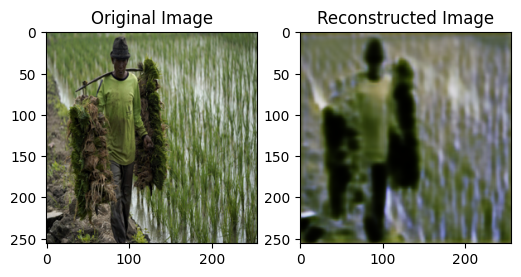

File irigasi.jpeg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Reconstruction error: 0.006066927220672369
Gambar ini bukan daun padi.


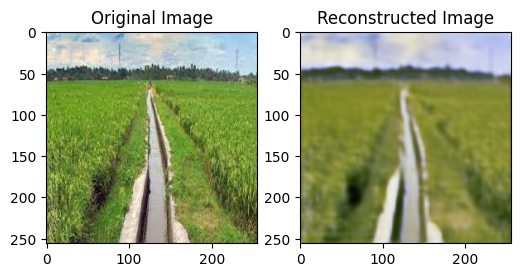

File tanah.jpeg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Reconstruction error: 0.017662717029452324
Gambar ini bukan daun padi.


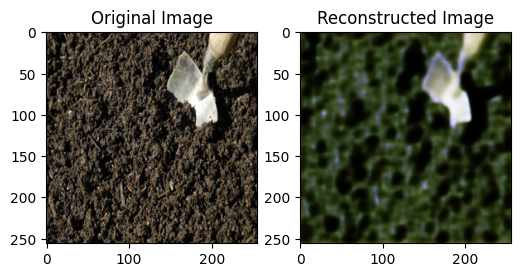

File rumput.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Reconstruction error: 0.01398932933807373
Gambar ini bukan daun padi.


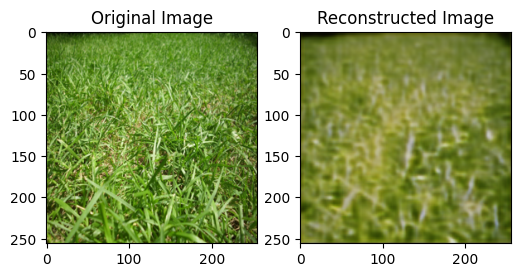

File kucing.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Reconstruction error: 0.007618358824402094
Gambar ini bukan daun padi.


File normal3.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Reconstruction error: 0.025069668889045715
Gambar ini bukan daun padi.


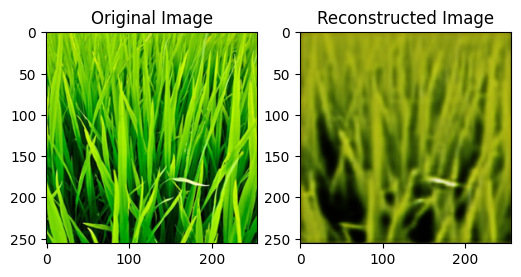

File normal.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Reconstruction error: 0.0014947057934477925
Gambar ini adalah daun padi.


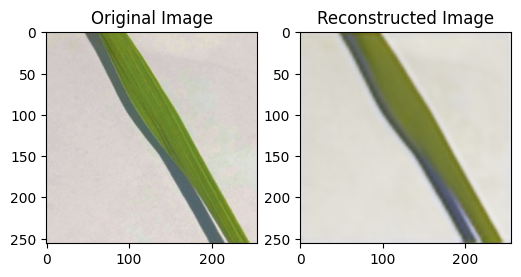

File normal2.jpeg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Reconstruction error: 0.004975991789251566
Gambar ini adalah daun padi.


File normal1.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Reconstruction error: 0.005967653822153807
Gambar ini adalah daun padi.


File leafblast2.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Reconstruction error: 0.00899725966155529
Gambar ini bukan daun padi.


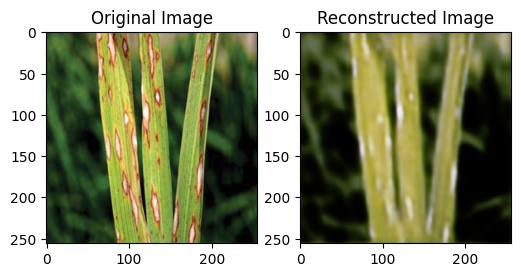

File leafblast1.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Reconstruction error: 0.02755042165517807
Gambar ini bukan daun padi.


File hispa.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Reconstruction error: 0.00574493408203125
Gambar ini adalah daun padi.


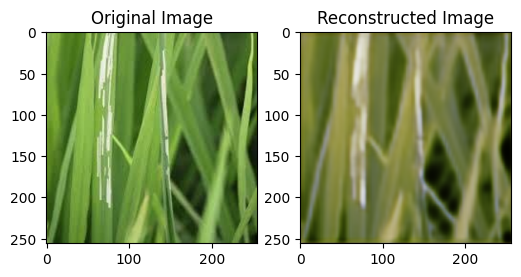

File brownspot2.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Reconstruction error: 0.005151371005922556
Gambar ini adalah daun padi.


File brownspot1.jpeg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Reconstruction error: 0.005992598365992308
Gambar ini adalah daun padi.


File Tiara.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Reconstruction error: 0.01205099280923605
Gambar ini bukan daun padi.


File perpustakaan.jpg telah diunggah.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Reconstruction error: 0.020321836695075035
Gambar ini bukan daun padi.


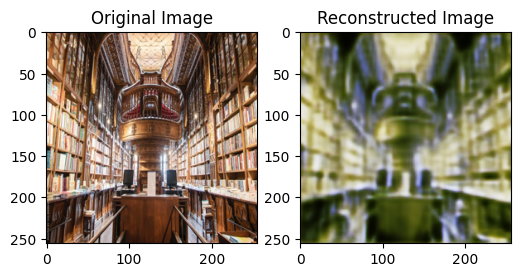

In [ ]:
# Widget untuk upload gambar (multiple upload)
uploader = widgets.FileUpload(accept="image/*", multiple=True)
uploader.observe(on_upload_change, names='value')
display(uploader)

In [ ]:
# Mengonversi model ke format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)
# Enable TF Select to support unsupported operations
converter.experimental_new_converter = True # This might be needed if using old TFLite versions
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

# Simpan model TFLite
with open('autoencoderModel.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp_ebcmg5i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)
Captures:
  137180247759104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180247960992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180585937024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180758510400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180758510048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180758521840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180758508464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180758522192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180758508112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137180760090832: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [9]:
from tflite_support.metadata_writers import writer_utils
from tflite_support.metadata_writers import image_classifier

# Path ke model TFLite asli dan output model dengan metadata
MODEL_PATH = "autoencoderModel.tflite"
OUTPUT_PATH = "autoencoderMetadata.tflite"

# Buat Metadata Writer
writer = image_classifier.MetadataWriter.create_for_inference(
    model_buffer=writer_utils.load_file(MODEL_PATH),
    input_norm_mean=[0.0],
    input_norm_std=[1.0 / 255.0],
    label_file_paths=[]
)

# Tambahkan metadata ke model
model_with_metadata = writer.populate()

# Simpan model dengan metadata
writer_utils.save_file(model_with_metadata, OUTPUT_PATH)
print(f"Model dengan metadata disimpan di: {OUTPUT_PATH}")

Model dengan metadata disimpan di: autoencoderMetadata.tflite
